<a href="https://colab.research.google.com/github/yanos84/Cnn_tutorial/blob/main/Copie_de_opencv_cnn_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OpenCV** is a huge open-source library for computer vision, machine learning, and image processing. OpenCV supports a wide variety of programming languages like Python, C++, Java, etc. It can process images and videos to **identify** objects, faces, or even the handwriting of a human. When it is integrated with various libraries, such as Numpy which is a highly optimized library for numerical operations, then the number of weapons increases in your Arsenal i.e whatever operations one can do in Numpy can be combined with OpenCV. This OpenCV tutorial will help you learn the Image-processing from Basics to Advance, like operations on Images, Videos using a huge set of Opencv-programs and projects.

To use opencv, simply import cv2 library.

In [ ]:
import cv2
cv2.__version__

'4.8.0'

Following types of files are supported in OpenCV library:

*   Windows bitmaps – *.bmp, *.dib
*   JPEG files – *.jpeg, *.jpg
*   Portable Network Graphics – *.png
*   WebP – *.webp
*   Sun rasters – *.sr, *.ras
*   TIFF files – *.tiff, *.tif
*   Raster and Vector geospatial data supported by GDAL


  To use the OpenCV library in python, we need essentially Numpy and Pyplot libraries.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

To read an image, we use cv2.imred(). This function uses two flags to format an image. The most used on is **IMREAD_COLOR** : If set, always convert image to the 3 channel BGR color image. We load the "eye.jpg" image in a variable called "img":

In [ ]:
img = cv2.imread("eye.jpg", cv2.IMREAD_COLOR)


To properly display the image by pyplot, we have to order the colors to be in BGR format.
An RGB image has three channels: red, green, and blue. RGB channels roughly follow the color receptors in the human eye, and are used in computer displays and image scanners.

If the RGB image is 24-bit (the industry standard as of 2005), each channel has 8 bits, for red, green, and blue—in other words, the image is composed of three images (one for each channel), where each image can store discrete pixels with conventional brightness intensities between 0 and 255. If the RGB image is 48-bit (very high color-depth), each channel has 16-bit per pixel color, that is 16-bit red, green, and blue for each per pixel.

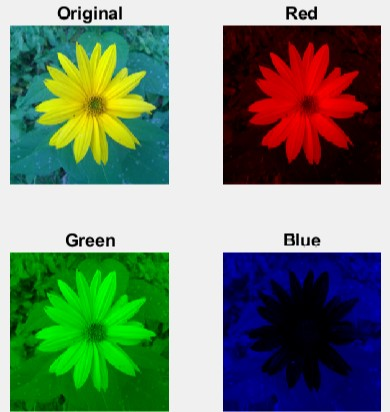

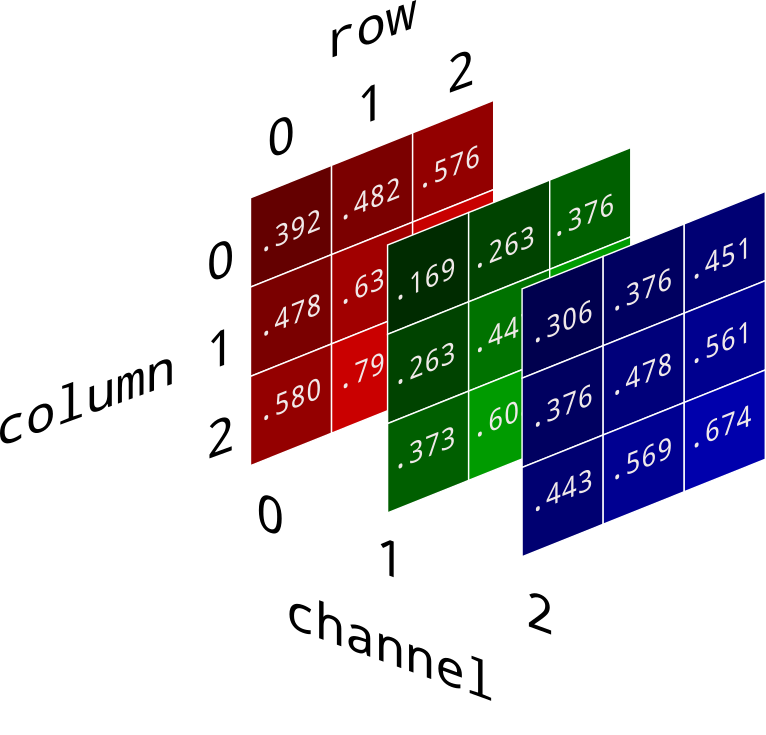

To do so we use cv2.cvtColor to convert the image into the appropriate format. The flag COLOR_BGR2RGB is the corresponding one. We can use this image (you must put it in the /content folder and rename it as in the code)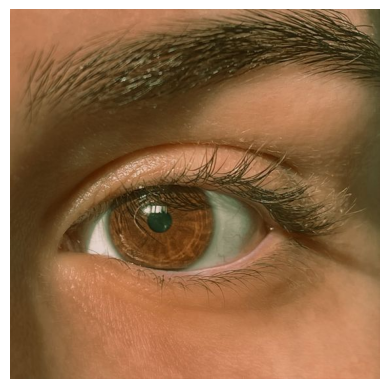

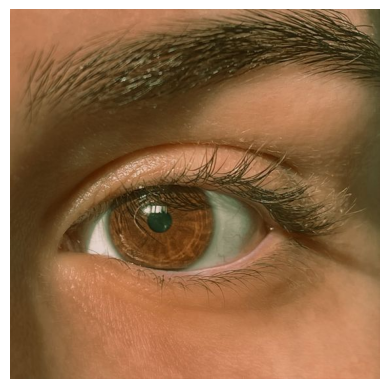

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off') # Turn off axis
plt.show()

3


array([[[201, 136,  98],
        [199, 134,  96],
        [197, 132,  94],
        ...,
        [ 79,  76,  45],
        [ 75,  72,  41],
        [ 73,  70,  39]],

       [[201, 136,  98],
        [199, 134,  96],
        [197, 132,  94],
        ...,
        [ 78,  75,  44],
        [ 74,  71,  40],
        [ 72,  69,  38]],

       [[200, 135,  97],
        [198, 133,  95],
        [196, 131,  93],
        ...,
        [ 79,  76,  45],
        [ 75,  72,  41],
        [ 73,  70,  39]],

       ...,

       [[104,  74,  40],
        [103,  73,  39],
        [102,  72,  38],
        ...,
        [190, 132,  94],
        [189, 131,  93],
        [189, 131,  93]],

       [[104,  74,  40],
        [103,  73,  39],
        [102,  72,  38],
        ...,
        [190, 132,  94],
        [190, 132,  94],
        [190, 132,  94]],

       [[103,  73,  39],
        [103,  73,  39],
        [102,  72,  38],
        ...,
        [190, 132,  94],
        [190, 132,  94],
        [191, 133,  95]]], dtype=uint8)
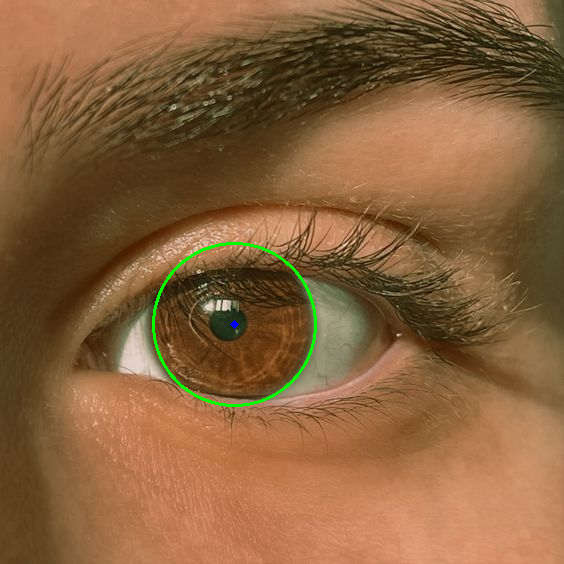

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.blur(gray, (10,10))
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, param2 = 30, minRadius = 50, maxRadius = 90)
print(cv2.HOUGH_GRADIENT)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)
img



---
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.


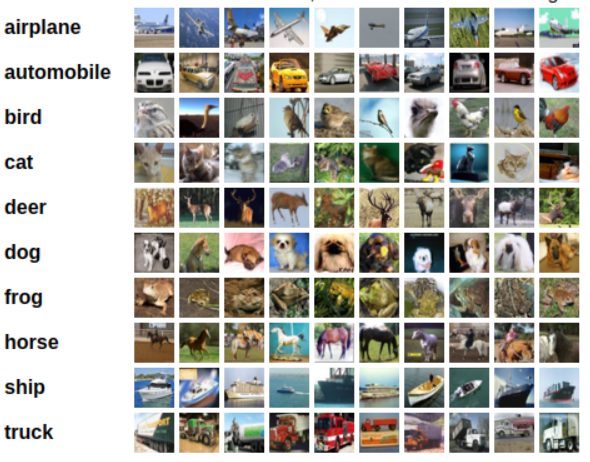

How to load cifar10?

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

def load_cifar10():
  (x_t, y_t), (x_s, y_s) = cifar10.load_data()
  #x_t, x_s = x_t.astype("float32")/255.0,  x_s.astype("float32")/255.0
  return (x_t, y_t), (x_s, y_s)


Visualize the dataset

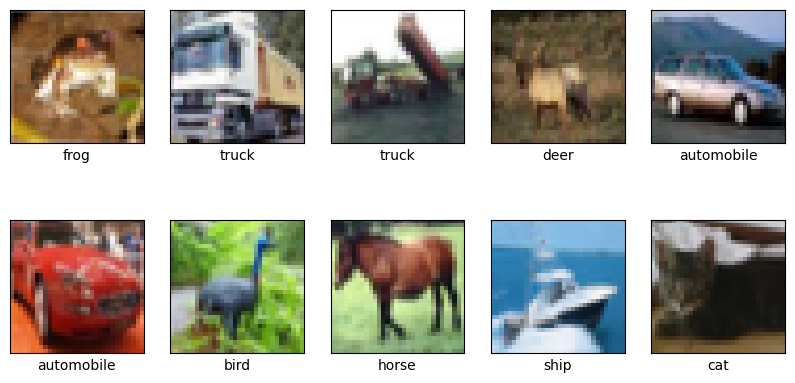

In [ ]:
from matplotlib import pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

(train_images, train_labels), (test_images, test_labels) = load_cifar10()

# Visualize ten random images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Display the image
    plt.imshow(train_images[i])
    # Add the class label below each image
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Now, we define a CNN block to use it for the model creation
see [This link](https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-cnn/)

In [ ]:
class Cnn_block(layers.Layer):
  def __init__(self, nb_channels, kernel_size = 3):
    super(Cnn_block, self).__init__()
    self._conv = layers.Conv2D(nb_channels, kernel_size, activation = 'relu')
    self._max1 = layers.MaxPool2D()

  def call(self, input_tensor):
    x = self._conv(input_tensor)
    x = self._max1(x)
    return x


if __name__=='__main__':
  (x_train, y_train), (x_test, y_test) = load_cifar10()


Now, we can create our model

In [ ]:
my_model = keras.Sequential(
    [
      #layers.Input(shape=(32, 32, 3)),
      Cnn_block(32),
      Cnn_block(64),
      layers.Flatten(),
      layers.Dense(10)
    ]
)
my_model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(),
    metrics = ['accuracy']
)
my_model.fit(x_train, y_train, batch_size = 64, epochs = 4, verbose = 2)
#my_model.summary()

This model can be redefined without cnn blocks :

In [ ]:
model = tf.keras.models.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, 3, padding = 'valid', activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation='relu'),
        layers.Conv2D(256, 3, activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10),
    ]
)

In [ ]:
model.compile(
    loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate=3e-4),
    metrics=["accuracy"],
)

In [ ]:
model.summary()

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=2)

In [ ]:
model.evaluate(x_test, y_test, batch_size=64)